In [10]:
#Part 2 - Maximum Likelihood Estimation
#Gabriela Sewdhan - 813001696
#Emilo Gopaul - 816007034

import numpy as np
import torch as th
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [11]:
def plot_loss(loss_curve):
    plt.plot(list(range(len(loss_curve))), loss_curve)

In [12]:
#Loss function using the 2-parameter Weibull distribution
def loss_function(dataset, k, lam, eps=0.001):
    p1 = th.log(k)
    p2 = (k-1) * th.log(dataset)
    p3 = (k * th.log(lam))
    p4 = ((dataset/lam)**k)
    acc = th.mean(p1 + p2 - p3 - p4)
    return -acc


class Model(nn.Module):
    def __init__(self):
        super().__init__()
        #K lies between 0 and 1
        k_prime = np.abs(np.random.uniform(0, 1))
        lam_prime = np.random.normal(2)
        self.k_prime = nn.Parameter(th.tensor(k_prime))
        self.lam_prime = nn.Parameter(th.tensor(lam_prime))

    def k(self):
        return th.sigmoid(self.k_prime)

    def lam(self):
        return th.abs(self.lam_prime)

    def loss(self, dataset):
        return loss_function(dataset, self.k(), self.lam())


In [13]:
model = Model()
lr = 0.1
optimiser = optim.SGD(model.parameters(), lr=lr)
num_iters = 10000
loss_curve = []

In [14]:
fp = open('data.npy', 'rb')
dataset = np.load(fp)
fp.close()
dataset = th.tensor(dataset, dtype=th.float32)

In [15]:
for i in range(num_iters):
    optimiser.zero_grad()
    loss_value = model.loss(dataset)
    loss_curve.append(loss_value.data.item())
    loss_value.backward()
    optimiser.step()

In [16]:
k = model.k().detach().numpy()
lam = model.lam().detach().numpy()

#Display the values for Lambda and K
print("Lambda: ", lam)
print("K: ", k)

Lambda:  1.2063501
K:  0.9577319


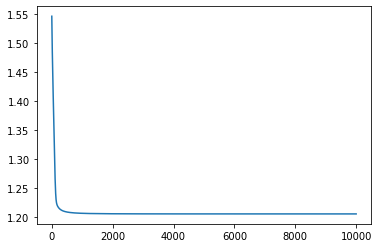

In [17]:
#Display Loss Curve
plot_loss(loss_curve)

C:\Users\gabie\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


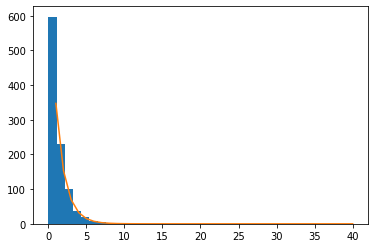

In [18]:
#Histogram plotted to check sanity
histogram = plt.hist(dataset.numpy(), bins=int(np.max(dataset.numpy())))
arr = []
#Weibull Distribution equation used
for i in range(41):
    prob1 = k / lam
    prob2 = (i/lam)**(k - 1)
    prob3 = np.exp(-(i/lam)**k)
    prob = prob1 * prob2 * prob3
    arr.append(prob * len(dataset))
plt.plot(list(range(41)), arr)